# D'Espagnat's experiment numerical circuit simulation for a full box

## Context

In this notebook we simulate d'Espagnat's strategy for local discrimination of the full boxes. For this purpose we use the *pennylane* package. We simulate the experiment for a full box.

## Output

- Numerical output photon distributions for a full box

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pennylane as qml

In [3]:
def my_quantum_function(theta = 0, phi = 0):
    qml.RY(theta, wires=r'$|q_i\rangle$')
    qml.RZ(phi, wires=r'$|q_i\rangle$')
    return qml.sample()

dev = qml.device('default.qubit', wires=[r'$|q_i\rangle$'], shots=1)
circuit = qml.QNode(my_quantum_function, dev)

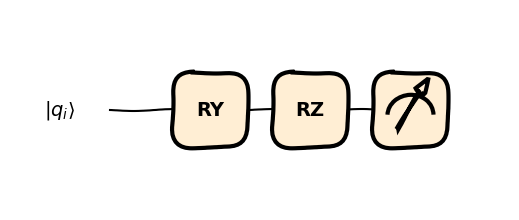

In [4]:
fig, ax = qml.draw_mpl(circuit, style='sketch')(0,0)
plt.savefig('circuit0.png', transparent=True)
plt.show()

# Defining the box parameters

In [21]:
n = 20 # (half) number of qubits in the box
N = 2*n

theta0 = np.pi/2.*0 # polar angle for state 0
phi = np.pi/2. # azimuthal angle for state 0

order = np.zeros(2*n) # create 2N qubits in state 0
order[n:] = 1. # transform second half of qubits to state 1
np.random.shuffle(order) # shuffle qubits in the box

theta = theta0 + order*np.pi # shuffled angles

#phi = phi0 bc of how the circuit is built

# Single box experiment

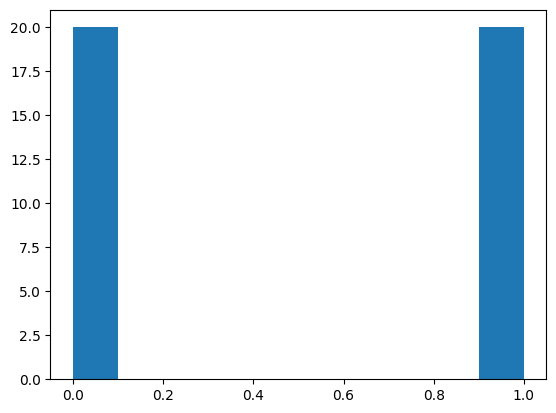

In [22]:
samples = np.array(circuit(theta, phi)) # sample all qubits in the z-axis
plt.hist(samples)
plt.show()

In [23]:
nh = (samples == 0).sum()
print("Number of horizontally polarized photons counted: {}".format(nh))

Number of horizontally polarized photons counted: 20


# M-copies experiment

In [24]:
M = 50 # number of box copies
nh = [] # list containing each measurement result per copy

for i in range(M):
    np.random.shuffle(order) # shuffle qubits in the box
    theta = theta0 + order*np.pi # shuffled angles
    
    samples = np.array(circuit(theta, phi)) # sample all qubits in the z-axis
    nh.append((samples == 0).sum())

nh = np.array(nh)

In [25]:
print("Mean number of horizontally polarized photons counted: {}".format(nh.mean()))
print("Variance of horizontally polarized photons counted: {}".format(nh.var()))

Mean number of horizontally polarized photons counted: 20.0
Variance of horizontally polarized photons counted: 0.0


# $\langle \hat{n}_H \rangle $ and $\langle (\Delta \hat{n}_H)^2 \rangle $ vs $\theta$

In [26]:
theta0_list = np.linspace(0,np.pi,50)

nh_mean = []
all_nhs = []
nh_var = []

for theta0 in theta0_list:
    print(theta0)
    
    nh = []
    
    for i in range(M):
        np.random.shuffle(order) # shuffle qubits in the box
        theta = theta0 + order*np.pi # shuffled angles
        
        samples = np.array(circuit(theta, phi)) # sample all qubits in the z-axis
        nh.append((samples == 0).sum())
        
    nh = np.array(nh)
    all_nhs.append(nh)
    nh_mean.append(np.mean(nh))
    nh_var.append(np.var(nh))
    
all_nhs = np.array(all_nhs)
nh_mean = np.array(nh_mean)
nh_var = np.array(nh_var)

0.0
0.0641141357875468
0.1282282715750936
0.19234240736264038
0.2564565431501872
0.32057067893773394
0.38468481472528077
0.4487989505128276
0.5129130863003744
0.5770272220879211
0.6411413578754679
0.7052554936630148
0.7693696294505615
0.8334837652381083
0.8975979010256552
0.9617120368132019
1.0258261726007487
1.0899403083882955
1.1540544441758422
1.218168579963389
1.2822827157509358
1.3463968515384828
1.4105109873260295
1.4746251231135763
1.538739258901123
1.6028533946886698
1.6669675304762166
1.7310816662637634
1.7951958020513104
1.8593099378388571
1.9234240736264039
1.9875382094139507
2.0516523452014974
2.1157664809890444
2.179880616776591
2.243994752564138
2.3081088883516845
2.3722230241392315
2.436337159926778
2.500451295714325
2.5645654315018716
2.6286795672894185
2.6927937030769655
2.756907838864512
2.821021974652059
2.8851361104396056
2.9492502462271526
3.013364382014699
3.077478517802246
3.141592653589793


In [29]:
np.save("data/nh_vs_theta_M{}_N{}".format(M,N), all_nhs)
np.save("data/nh_vs_theta_mean_M{}_N{}".format(M,N), nh_mean)
np.save("data/nh_vs_theta_var_M{}_N{}".format(M,N), nh_var)

In [31]:
nh_mean = np.load("data/nh_vs_theta_mean_M{}_N{}.npy".format(M,N))
nh_var = np.load("data/nh_vs_theta_var_M{}_N{}.npy".format(M,N))

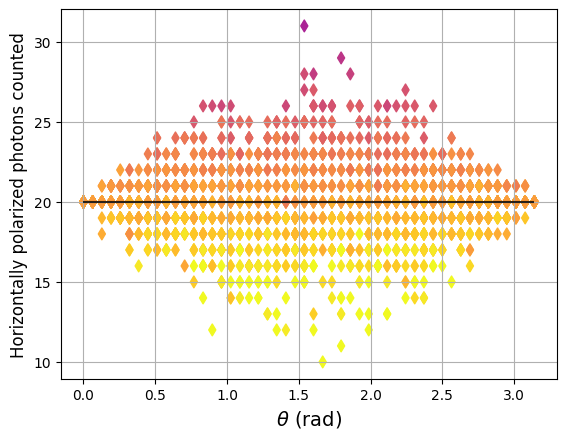

In [34]:
plt.hlines(n, 0, np.pi, color='k', alpha = 0.8)
#plt.plot(theta0_list, N+2*np.sqrt(N/2)*np.sin(theta0_list), 'k--', alpha=0.75)
#plt.plot(theta0_list, N-2*np.sqrt(N/2)*np.sin(theta0_list), 'k--', alpha=0.75)
#plt.fill_between(theta0_list, N+2*np.sqrt(N/2)*np.sin(theta0_list), N-2*np.sqrt(N/2)*np.sin(theta0_list), color='g', alpha=0.25)
for nhs in all_nhs.T:
    colors = np.abs(np.array(nhs)-N)
    colors = colors/colors.max()
    plt.scatter(theta0_list, nhs, c=cm.plasma(colors), marker='d', alpha = 1)
plt.ylabel(r"Horizontally polarized photons counted", fontsize=12)
plt.xlabel(r'$\theta$ (rad)', fontsize=14)
#plt.plot(theta0_list,nh_mean, alpha = 1, lw=2)
#plt.xlim([0-1e-2,np.pi+1e-2])
plt.gca().set_facecolor("white")
plt.grid()
plt.savefig('nh_vs_theta.png', transparent=True)
plt.show()

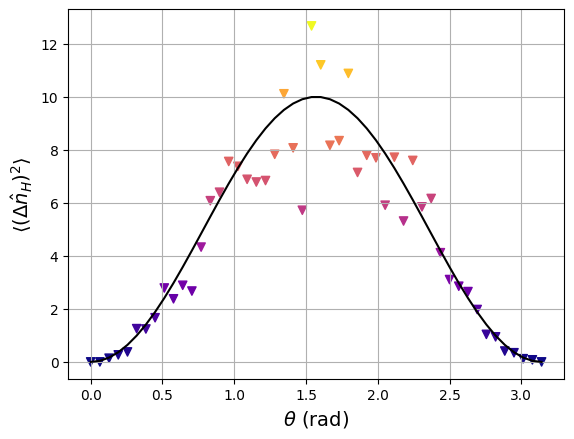

In [36]:
plt.plot(theta0_list, 0.5*n*np.sin(theta0_list)**2, alpha = 1, color='k', label=r'$\frac{N}{2} \sin^2\theta$')
colors = nh_var/nh_var.max()
plt.scatter(theta0_list, nh_var, c=cm.plasma(colors), marker='v', alpha = 1, label='Sample variances')
plt.ylabel(r"$\langle (\Delta \hat{n}_H)^2 \rangle $", fontsize=14)
plt.xlabel(r'$\theta$ (rad)', fontsize=14)
plt.grid()
#plt.legend(fontsize=10)
plt.savefig('var_vs_theta.png', transparent=True)
plt.show()